In [1]:
import pandas as pd

fn = "spotify_data clean.csv"
df = pd.read_csv(fn)

# common column name candidates
pop_cols = ['popularity', 'Popularity', 'track_popularity', 'pop_score', 'pop']
title_cols = ['track_name', 'name', 'song_name', 'title', 'track', 'track_title']
artist_cols = ['artist', 'artists', 'artist_name', 'artistName']

cols = set(df.columns.str.strip())

# pick first matching column name from candidates
pop_col = next((c for c in pop_cols if c in cols), None)
title_col = next((c for c in title_cols if c in cols), None)
artist_col = next((c for c in artist_cols if c in cols), None)

if pop_col is None:
    raise ValueError(f"No popularity column found. Available columns: {sorted(cols)}")

# ensure numeric popularity
df[pop_col] = pd.to_numeric(df[pop_col], errors='coerce')
df = df.dropna(subset=[pop_col])

# sort and take top 10
top10 = df.sort_values(by=pop_col, ascending=False).head(10)

# print results
for i, (_, row) in enumerate(top10.iterrows(), 1):
    pop_val = int(row[pop_col]) if pd.notna(row[pop_col]) else row[pop_col]
    if title_col and artist_col:
        print(f"{i}. {row[title_col]} — {row[artist_col]} (popularity: {pop_val})")
    elif title_col:
        print(f"{i}. {row[title_col]} (popularity: {pop_val})")
    else:
        # fallback: print the row's popularity and the first few columns
        others = ", ".join(f"{c}: {row[c]}" for c in top10.columns.drop(pop_col)[:3])
        print(f"{i}. popularity: {pop_val} — {others}")

1. Golden — HUNTR/X (popularity: 99)
2. Opalite — Taylor Swift (popularity: 97)
3. Elizabeth Taylor — Taylor Swift (popularity: 95)
4. Man I Need — Olivia Dean (popularity: 95)
5. Father Figure — Taylor Swift (popularity: 94)
6. BIRDS OF A FEATHER — Billie Eilish (popularity: 94)
7. Soda Pop — Saja Boys (popularity: 94)
8. Your Idol — Saja Boys (popularity: 93)
9. Actually Romantic — Taylor Swift (popularity: 93)
10. Wood — Taylor Swift (popularity: 93)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# use existing pop_col and df
genre_col = 'artist_genres'
pop = pop_col  # 'track_popularity'

# prepare genre-level dataframe (split comma-separated genres, explode)
g = df[[genre_col, pop]].dropna(subset=[genre_col, pop]).copy()
g[genre_col] = g[genre_col].str.split(',').apply(lambda lst: [s.strip() for s in lst])
g = g.explode(genre_col)
g[genre_col] = g[genre_col].str.lower()

# aggregate: average popularity per genre (and include count)
agg = g.groupby(genre_col)[pop].agg(['mean', 'count']).rename(columns={'mean': 'avg_pop', 'count': 'n'})
agg = agg[agg['n'] >= 5]  # optional: require at least 5 tracks to avoid tiny-sample noise
top_n = agg.sort_values('avg_pop', ascending=False).head(15)

# plot
plt.figure(figsize=(10, 7))
sns.barplot(x='avg_pop', y=top_n.index, data=top_n.reset_index(), palette='viridis')
plt.xlabel('Average Track Popularity')
plt.ylabel('Genre')
plt.title('Top 15 Genres by Average Track Popularity')
# annotate counts on bars
for i, (val, cnt) in enumerate(zip(top_n['avg_pop'], top_n['n'])):
    plt.text(val + 0.5, i, f'n={cnt}', va='center')
plt.tight_layout()
plt.show()

In [2]:
# Top 10 artists by artist_popularity with their genres
a = df[['artist_name', 'artist_popularity', 'artist_followers', 'artist_genres']].dropna(subset=['artist_name'])
# keep the best row per artist by highest artist_popularity, then followers as tiebreaker
a = a.sort_values(['artist_popularity', 'artist_followers'], ascending=False).drop_duplicates(subset=['artist_name'])
top_artists = a.head(10)

# display concise results
for i, row in enumerate(top_artists.itertuples(index=False), 1):
    genres = (row.artist_genres or '').strip() if pd.notna(row.artist_genres) else 'N/A'
    print(f"{i}. {row.artist_name} — popularity: {row.artist_popularity}, followers: {row.artist_followers}, genres: {genres}")

1. Taylor Swift — popularity: 100, followers: 145542136, genres: country, pop, indie, folk
2. Drake — popularity: 95, followers: 103126025, genres: rap
3. Bad Bunny — popularity: 95, followers: 102610644, genres: reggaeton, trap latino, urbano latino, latin
4. The Weeknd — popularity: 94, followers: 113039308, genres: r&b pop, alternative r&b, hip hop, synthpop
5. Justin Bieber — popularity: 91, followers: 85050158, genres: pop, contemporary r&b
6. Sabrina Carpenter — popularity: 91, followers: 26559943, genres: pop
7. Billie Eilish — popularity: 90, followers: 118797451, genres: alternative pop, electropop, dark pop
8. Ariana Grande — popularity: 90, followers: 107418606, genres: pop
9. Bruno Mars — popularity: 90, followers: 75513910, genres: N/A
10. Rihanna — popularity: 90, followers: 69050055, genres: pop, r&b


3.10.7
0.13.2


C:\Users\carlo\AppData\Local\Temp\ipykernel_21144\4103040807.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_pop', y=top_2025.index, data=top_2025.reset_index(), palette='viridis')


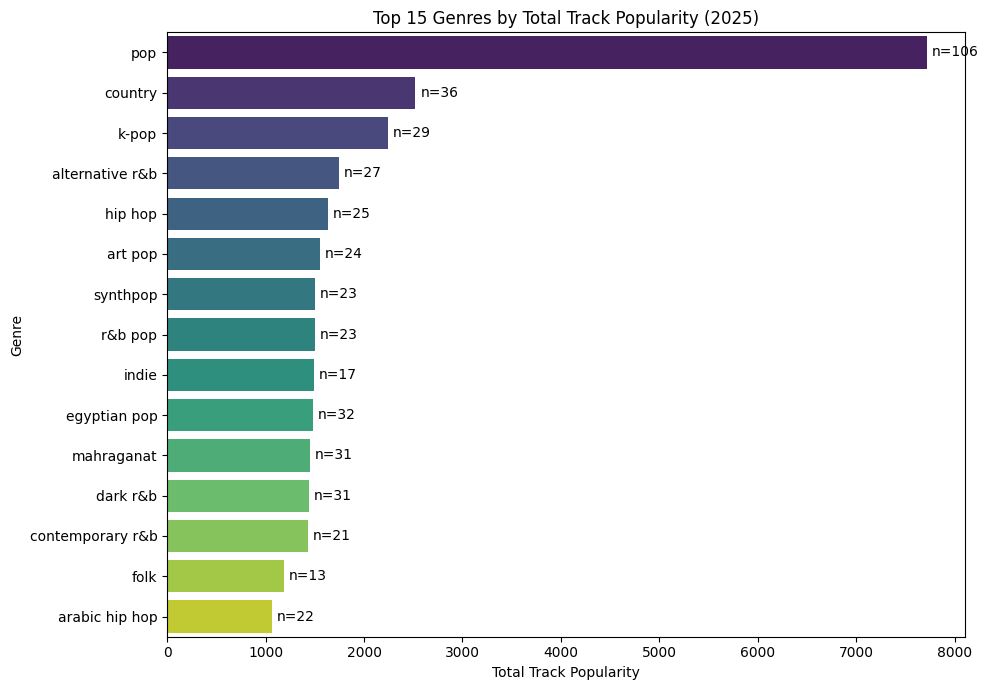

In [26]:
# Get top 15 genres for 2025 by total popularity
agg_2025 = g_2025.groupby(genre_col)[pop].agg(['sum', 'count']).rename(columns={'sum': 'total_pop', 'count': 'n'})
agg_2025 = agg_2025[agg_2025['n'] >= 5]  # require at least 5 tracks
top_2025 = agg_2025.sort_values('total_pop', ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 7))
sns.barplot(x='total_pop', y=top_2025.index, data=top_2025.reset_index(), palette='viridis')
plt.xlabel('Total Track Popularity')
plt.ylabel('Genre')
plt.title('Top 15 Genres by Total Track Popularity (2025)')
# annotate counts on bars
for i, (val, cnt) in enumerate(zip(top_2025['total_pop'], top_2025['n'])):
    plt.text(val + 50, i, f'n={cnt}', va='center')
plt.tight_layout()
plt.show()

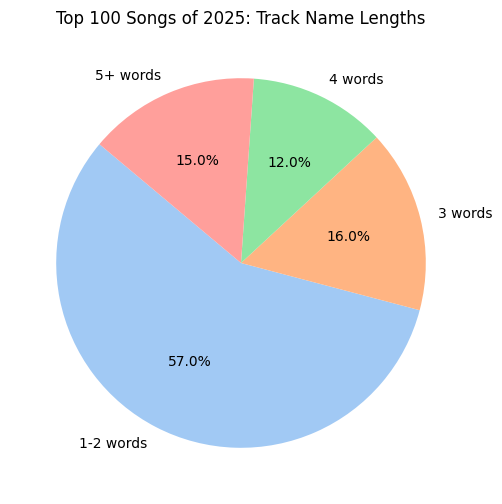

In [18]:
# Get top 100 songs for 2025
top100_2025 = df_2025.sort_values(by=pop_col, ascending=False).head(100)

# Count words in each track name
name_lengths_2025 = top100_2025[title_col].str.split().str.len()

# Categorize name lengths
def categorize(n):
    if n <= 2:
        return '1-2 words'
    elif n == 3:
        return '3 words'
    elif n == 4:
        return '4 words'
    else:
        return '5+ words'

categories_2025 = name_lengths_2025.map(categorize)
counts_2025 = categories_2025.value_counts().reindex(['1-2 words', '3 words', '4 words', '5+ words'], fill_value=0)

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts_2025, labels=counts_2025.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Top 100 Songs of 2025: Track Name Lengths')
plt.show()

C:\Users\carlo\AppData\Local\Temp\ipykernel_21144\2006313748.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts_100_2025.index, y=counts_100_2025.values, palette='deep')


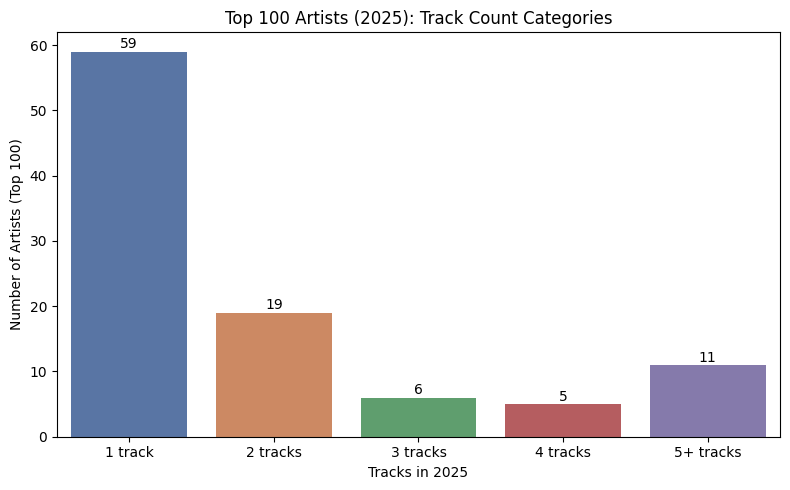

In [22]:
import seaborn as sns

# Use existing top100_artists_2025 to categorize by exact track counts and plot
import matplotlib.pyplot as plt

# Recompute precise categories: 1, 2, 3, 4, 5+ tracks
def cat_exact(n):
    if n == 1:
        return '1 track'
    elif n == 2:
        return '2 tracks'
    elif n == 3:
        return '3 tracks'
    elif n == 4:
        return '4 tracks'
    else:
        return '5+ tracks'

top100_artists_2025 = top100_artists_2025.copy()
top100_artists_2025['category_exact'] = top100_artists_2025['track_count'].map(cat_exact)

# Count artists per category
counts_100_2025 = top100_artists_2025['category_exact'].value_counts().reindex(
    ['1 track', '2 tracks', '3 tracks', '4 tracks', '5+ tracks'], fill_value=0
)

# Plot bar graph
plt.figure(figsize=(8, 5))
sns.barplot(x=counts_100_2025.index, y=counts_100_2025.values, palette='deep')
plt.xlabel('Tracks in 2025')
plt.ylabel('Number of Artists (Top 100)')
plt.title('Top 100 Artists (2025): Track Count Categories')
for i, v in enumerate(counts_100_2025.values):
    plt.text(i, v + 0.5, str(v), ha='center')
plt.tight_layout()
plt.show()

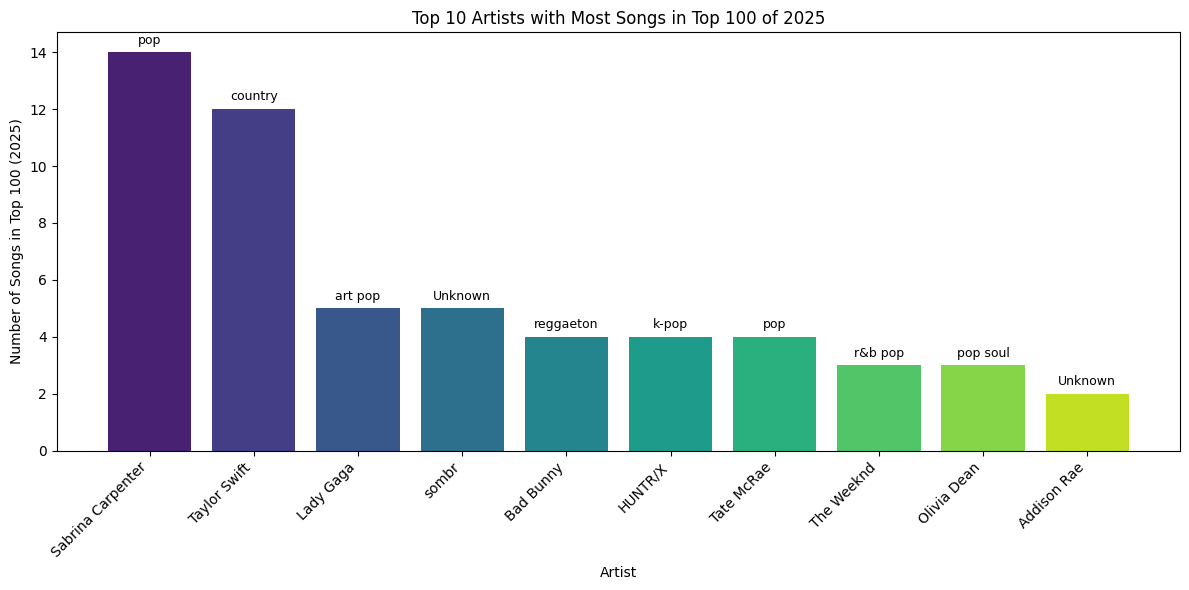


Top 10 Artists in Top 100 Songs of 2025:
1. Sabrina Carpenter - 14 songs (Genre: pop)
2. Taylor Swift - 12 songs (Genre: country)
3. Lady Gaga - 5 songs (Genre: art pop)
4. sombr - 5 songs (Genre: Unknown)
5. Bad Bunny - 4 songs (Genre: reggaeton)
6. HUNTR/X - 4 songs (Genre: k-pop)
7. Tate McRae - 4 songs (Genre: pop)
8. The Weeknd - 3 songs (Genre: r&b pop)
9. Olivia Dean - 3 songs (Genre: pop soul)
10. Addison Rae - 2 songs (Genre: Unknown)


In [25]:
# Get top 10 artists by track count in top 100 of 2025
top10_artists_in_top100 = top100_2025.groupby(artist_col).size().sort_values(ascending=False).head(10)

# Create a list to store artist names and their primary genre
artist_genre_data = []

for artist_name in top10_artists_in_top100.index:
    track_count = top10_artists_in_top100[artist_name]
    # Get the genre for this artist from the first occurrence in top100_2025
    artist_row = top100_2025[top100_2025[artist_col] == artist_name].iloc[0]
    genre_str = artist_row['artist_genres']
    
    # Extract primary genre (first genre in the list)
    if pd.notna(genre_str) and genre_str.strip():
        primary_genre = genre_str.split(',')[0].strip()
    else:
        primary_genre = 'Unknown'
    
    artist_genre_data.append({
        'artist': artist_name,
        'tracks': track_count,
        'genre': primary_genre
    })

# Create dataframe for plotting
plot_df = pd.DataFrame(artist_genre_data)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(plot_df)), plot_df['tracks'], color=sns.color_palette('viridis', len(plot_df)))
plt.xticks(range(len(plot_df)), plot_df['artist'], rotation=45, ha='right')
plt.xlabel('Artist')
plt.ylabel('Number of Songs in Top 100 (2025)')
plt.title('Top 10 Artists with Most Songs in Top 100 of 2025')

# Add genre labels on top of bars
for i, (tracks, genre) in enumerate(zip(plot_df['tracks'], plot_df['genre'])):
    plt.text(i, tracks + 0.2, f'{genre}', ha='center', va='bottom', fontsize=9, rotation=0)

plt.tight_layout()
plt.show()

# Print summary
print("\nTop 10 Artists in Top 100 Songs of 2025:")
for i, row in plot_df.iterrows():
    print(f"{i+1}. {row['artist']} - {row['tracks']} songs (Genre: {row['genre']})")